In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import r2_score, root_mean_squared_error

In [24]:
import pickle

# Read y_pred_test_data.pkl
with open('data/results/y_pred_test_data.pkl', 'rb') as file:
    y_pred_test_data = pickle.load(file)

# Read y_true_test_data.pkl
with open('data/results/y_true_test_data.pkl', 'rb') as file:
    y_true_test_data = pickle.load(file)
    
pred_true = pd.DataFrame([y_pred_test_data, y_true_test_data], index=['y_pred', 'y_true']).T

print("Mean yield in great plains from 2018-2020 is:", np.round(pred_true["y_true"].mean(), 2), "t/ha")
print("R2 score for validation years 2018-2020 is:", np.round(r2_score(y_true_test_data, y_pred_test_data), 2))
print("This R2 score is calculated using mean yield from great plains only")

Mean yield in great plains from 2018-2020 is: 2.77 t/ha
R2 score for validation years 2018-2020 is: 0.54
This R2 score is calculated using mean yield from great plains only


In [26]:
yield_df = pd.read_csv('data/CY-Bench/US/wheat/yield_wheat_US.csv')
us_wheat_mean = yield_df.loc[yield_df['harvest_year'].isin([2018, 2019, 2020]), "yield"].mean()

print("Mean yield across whole US from 2018-2020 is:", np.round(us_wheat_mean, 2), "t/ha")

Mean yield across whole US from 2018-2020 is: 3.85 t/ha


In [33]:
numerator = sum((pred_true["y_true"] - pred_true["y_pred"])**2)
denominator = sum((y_true_test_data - us_wheat_mean)**2)
r2_score_scratch = 1 - (numerator / denominator)

print("R2 score with national mean yield:", np.round(r2_score_scratch, 2))

R2 score with national mean yield: 0.81


#### The same applies for NRMSE

In [43]:
root_mean_squared_error(y_true_test_data, y_pred_test_data)

0.6125816057545874

In [41]:
print(np.round(root_mean_squared_error(y_true_test_data, y_pred_test_data) / np.mean(y_true_test_data),2))
print(np.round(root_mean_squared_error(y_true_test_data, y_pred_test_data) / us_wheat_mean, 2))

0.22
0.16


Check wheat yield in great plaisn

<Axes: ylabel='Count'>

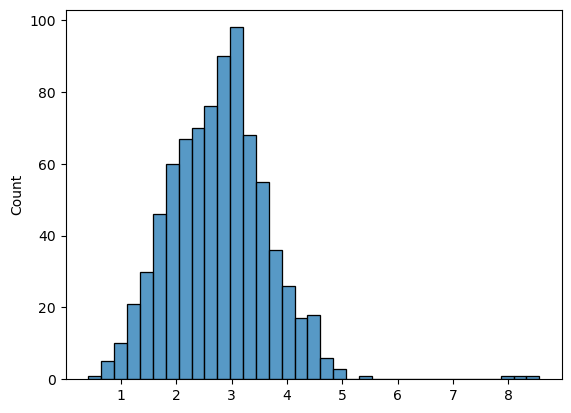

In [42]:
sns.histplot(y_true_test_data)